1. Inverted Images
2. Rescaling
3. Binarization
4. Noise Removal
5. Dilation and Erosion
6. Rotation / Deskewing
7. Removing Borders
8. Missing Borders
9. Transparency / Alpha Channel

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

image_file = 'data/1.png'
img = cv.imread(image_file)

In [2]:
#https://stackoverflow.com/questions/28816046/displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

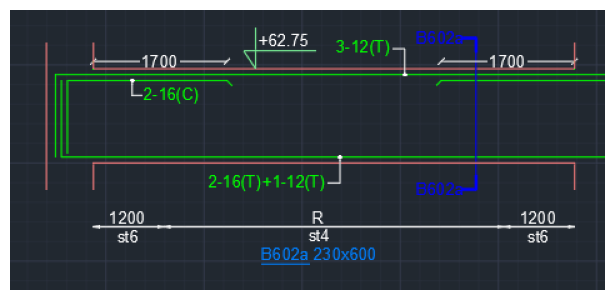

In [3]:
display(image_file)

## Inverted Images

In [4]:
inverted_image = cv.bitwise_not(img)
cv.imwrite("temp/1.png", inverted_image)

True

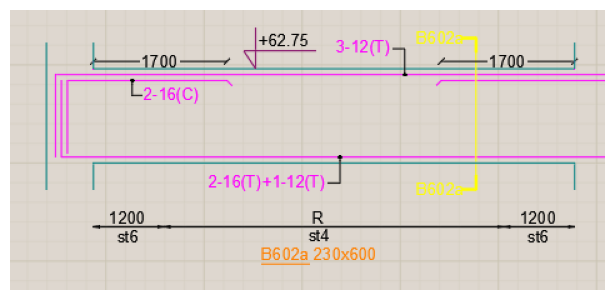

In [5]:
display("temp/1.png")

## Rescaling

## Binarization

In [6]:
def grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [7]:
gray_image = grayscale(img)
cv.imwrite("temp/gray.jpg", gray_image)

True

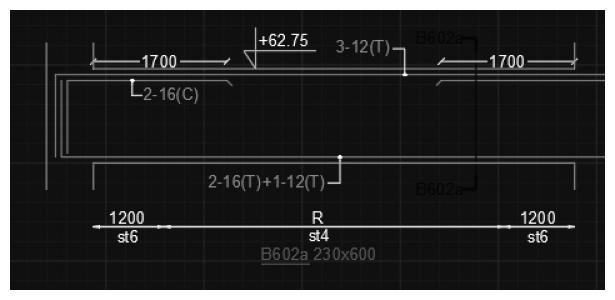

In [8]:
display("temp/gray.jpg")

In [14]:
thresh, im_bw = cv.threshold(gray_image, 100, 200, cv.THRESH_BINARY)
cv.imwrite("temp/bw_image.jpg", im_bw)

True

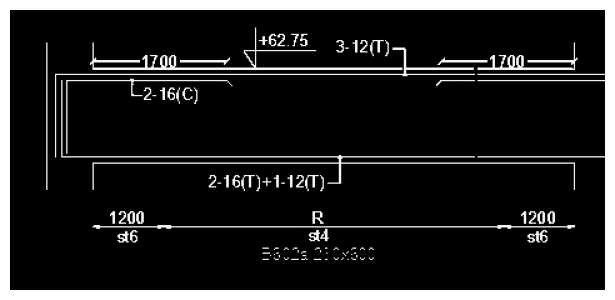

In [15]:
display("temp/bw_image.jpg")

## Noise Removal

In [18]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv.erode(image, kernel, iterations=1)
    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
    image = cv.medianBlur(image, 3)
    return (image)

In [19]:
no_noise = noise_removal(im_bw)
cv.imwrite("temp/no_noise.jpg", no_noise)

True

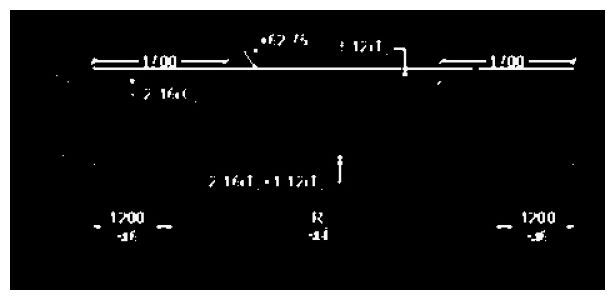

In [20]:
display("temp/no_noise.jpg")

## Dilation and Erosion

In [21]:
def thin_font(image):
    import numpy as np
    image = cv.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv.erode(image, kernel, iterations=1)
    image = cv.bitwise_not(image)
    return (image)

In [22]:
eroded_image = thin_font(no_noise)
cv.imwrite("temp/eroded_image.jpg", eroded_image)

True

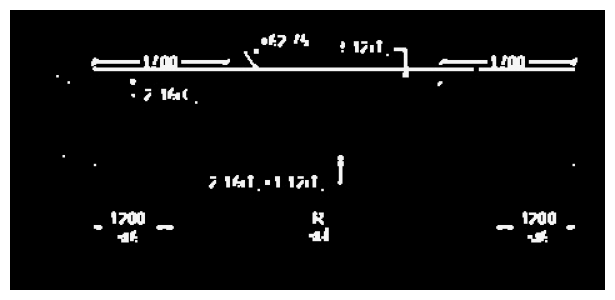

In [23]:
display("temp/eroded_image.jpg")

In [24]:
def thick_font(image):
    import numpy as np
    image = cv.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    image = cv.bitwise_not(image)
    return (image)

In [25]:
dilated_image = thick_font(no_noise)
cv.imwrite("temp/dilated_image.jpg", dilated_image)

True

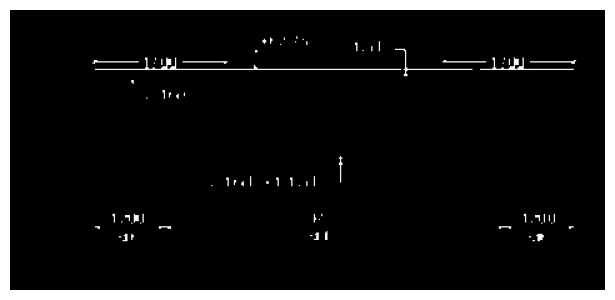

In [26]:
display("temp/dilated_image.jpg")